# Community Visualization
Here, we learn how to visualize the output of NetworkX's community detection, which is documented [here](https://networkx.org/documentation/stable/reference/algorithms/community.html). In the box below, you see the imports, including our Neo4j utility, which is a singleton that includes the necessary functions we implemented in the previous tutorials.


In [1]:
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the directory containing neo4j_utils.py (assuming test.ipynb is in task_1 folder)
module_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..', 'utils'))

# Check if the path is already in sys.path and add it if not
if module_path not in sys.path:
    print(f"Adding {module_path} to sys.path")
    sys.path.append(module_path)

import neo4j_utils as neo4j

# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Verify the connection
if db.verify_connection():
    print("Connection to Neo4j is successful!")
else:
    print("Connection to Neo4j failed!")

# close the connection
db.close()

Adding /Users/ramadanomar/projects/dsis-2024/Graph_Data_Analytics/utils to sys.path
Connection to Neo4j is successful!


## Simple Visualization
This is the most straightforward visualization we could come up with. What do you notice? How can we improve it?

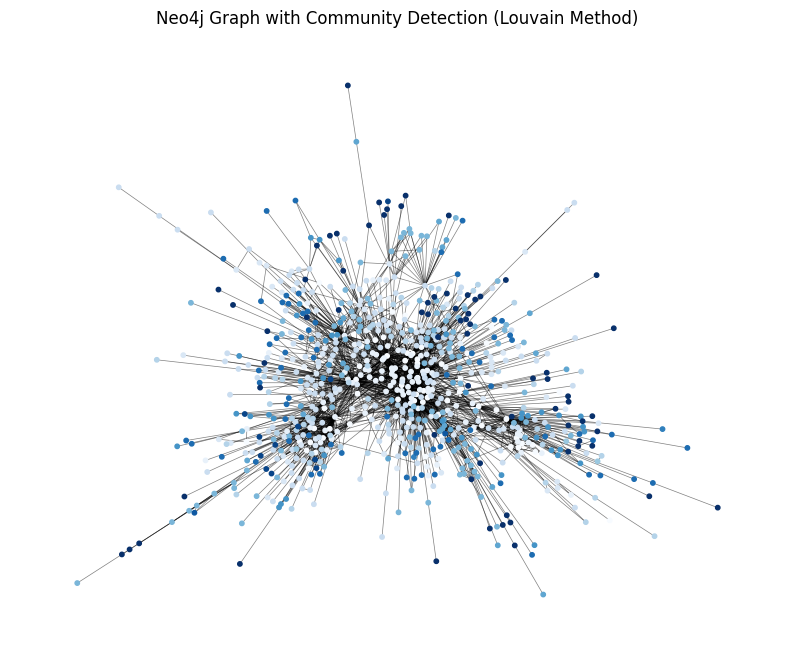

In [2]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load data into NetworkX
graph = db.load_data_into_networkx()

# Convert the graph to undirected (required for Louvain method)
graph_undirected = graph.to_undirected()

# Perform community detection using NetworkX Louvain method
communities = nx.algorithms.community.louvain_communities(graph_undirected)

# Create a partition dictionary to map nodes to community indices
partition = {}
for community_index, community in enumerate(communities):
    for node in community:
        partition[node] = community_index

# Draw the graph with community coloring
pos = nx.spring_layout(graph, k=0.5, iterations=600)

# Create a larger figure
plt.figure(figsize=(10, 8))

# Draw nodes and edges
node_size = 10
width = 0.5
nx.draw_networkx_nodes(graph, pos, node_color=list(partition.values()), node_size=node_size, cmap=plt.cm.Blues)
nx.draw_networkx_edges(graph, pos, alpha=0.5, width=width)

plt.title('Neo4j Graph with Community Detection (Louvain Method)')
plt.axis('off')
plt.show()

# Close the Neo4j connection when done
db.close()


## Improved Visualization
Why does this look better? What did we improve upon?


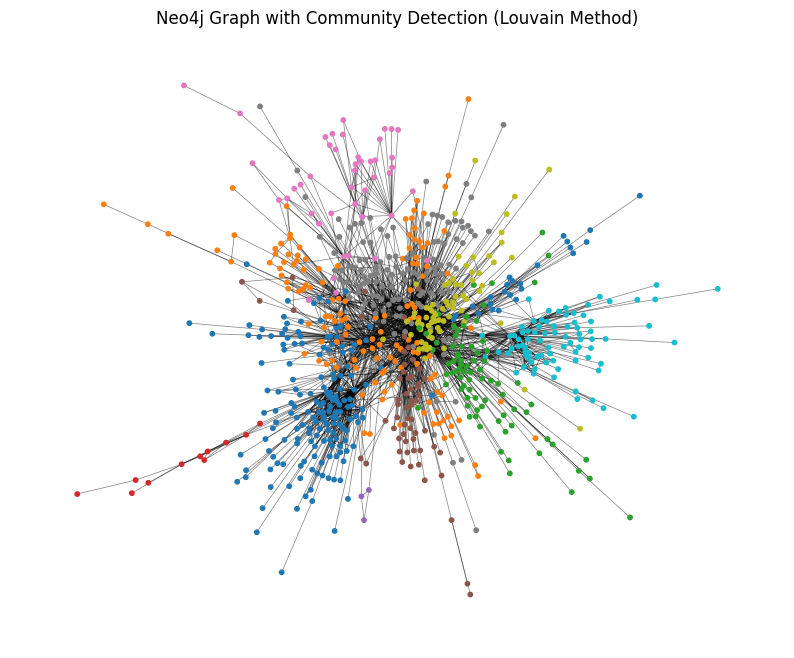

In [3]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load data into NetworkX
graph = db.load_data_into_networkx()

# Convert the graph to undirected (required for Louvain method)
graph_undirected = graph.to_undirected()

# Perform community detection using NetworkX Louvain method
communities = nx.algorithms.community.louvain_communities(graph_undirected)

# Create a partition dictionary to map nodes to community indices
partition = {}
for community_index, community in enumerate(communities):
    for node in community:
        partition[node] = community_index

# Get unique community labels
unique_communities = set(partition.values())

# Generate distinct colors for each community
num_communities = len(unique_communities)
colors = list(mcolors.TABLEAU_COLORS.values())  # Use Tableau colors for variety
community_colors = {community_label: colors[i % len(colors)] for i, community_label in enumerate(unique_communities)}

# Map community labels to colors
node_colors = [community_colors[partition[node]] for node in graph.nodes()]

# Draw the graph with community coloring
pos = nx.spring_layout(graph, k=0.5, iterations=500)

# Create a larger figure
plt.figure(figsize=(10, 8))

# Draw nodes and edges
node_size = 10
width = 0.5
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=node_size)
nx.draw_networkx_edges(graph, pos, alpha=0.5, width=width)

plt.title('Neo4j Graph with Community Detection (Louvain Method)')
plt.axis('off')
plt.show()

# Close the Neo4j connection when done
db.close()

## Task 2.3: Visualize the Subgraph of the Largest Community
This time, we want to extract the subgraph of the largest community in order to visualize it. Please help fill in the TODOs.


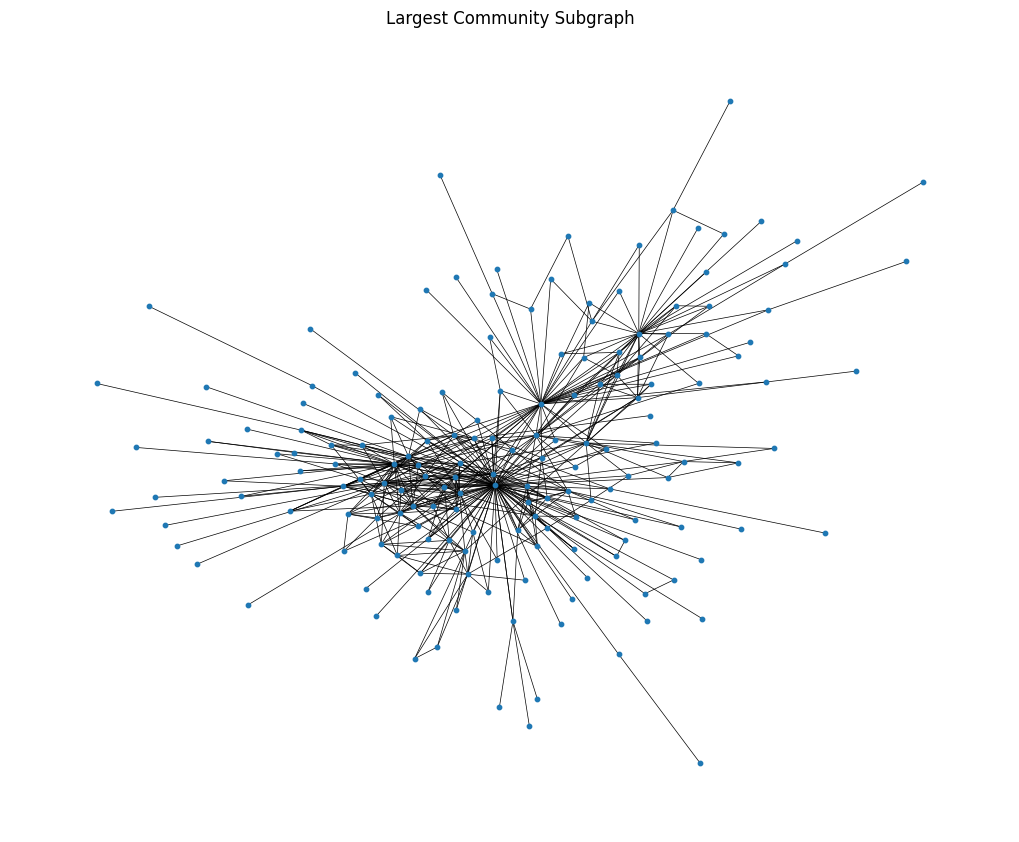

In [5]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load data into NetworkX
graph = db.load_data_into_networkx()

# Find communities in G using greedy modularity maximization.
communities = nx.algorithms.community.louvain_communities(graph)

# Identify the largest community
largest_community = max(communities, key=len)

# Extract the subgraph of the largest community
largest_subgraph = graph.subgraph(largest_community).copy()

# Draw the largest subgraph
pos = nx.spring_layout(largest_subgraph, k=0.5, iterations=600)
plt.figure(figsize=(10, 8))
nx.draw(largest_subgraph, pos, node_size=10, width=0.5, with_labels=False)
plt.title('Largest Community Subgraph')
plt.show()

# Close the Neo4j connection when done
db.close()
